In [1]:
# Fix figure.dpi
%matplotlib inline
# Display exactly the figure that will be saved
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.dpi']

100.0

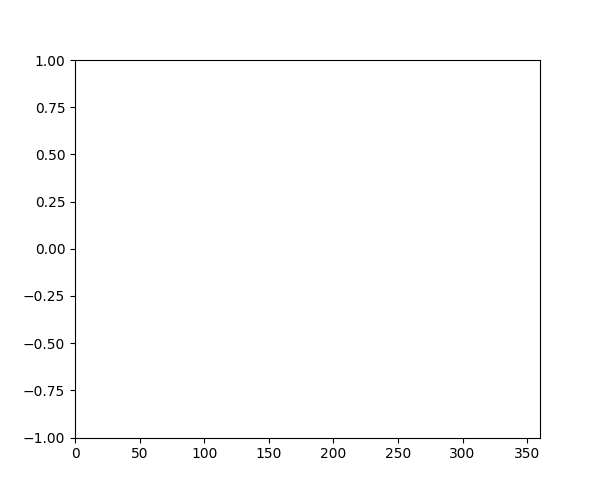

In [3]:
fig = plt.figure(figsize=(6, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0,360), ax.set_ylim(-1,1)

# FC : Figure coordinates (pixels)
# NFC : Normalized figure coordinates (0 → 1)
# DC : Data coordinates (data units)
# NDC : Normalized data coordinates (0 → 1)

DC_to_FC = ax.transData.transform
FC_to_DC = ax.transData.inverted().transform

NDC_to_FC = ax.transAxes.transform
FC_to_NDC = ax.transAxes.inverted().transform

NFC_to_FC = fig.transFigure.transform
FC_to_NFC = fig.transFigure.inverted().transform

In [4]:
# Top right corner in normalized figure coordinates
print(NFC_to_FC([1, 1])) # (600,500)

# Top right corner in normalized data coordinates
print(NDC_to_FC([1, 1])) # (540,440)

# Top right corner in data coordinates
print(DC_to_FC([360, 1])) # (540,440)

[600. 500.]
[540. 440.]
[540. 440.]


In [5]:
# Native data to normalized data coordinates
DC_to_NDC = lambda x: FC_to_NDC(DC_to_FC(x))

In [6]:
# Bottom left corner in data coordinates
print(DC_to_NDC([0, -1])) # (0.0, 0.0)

# Center in data coordinates
print(DC_to_NDC([180, 0])) # (0.5, 0.5)

# Top right corner in data coordinates
print(DC_to_NDC([360, 1])) # (1.0, 1.0)

[0. 0.]
[0.5 0.5]
[1. 1.]


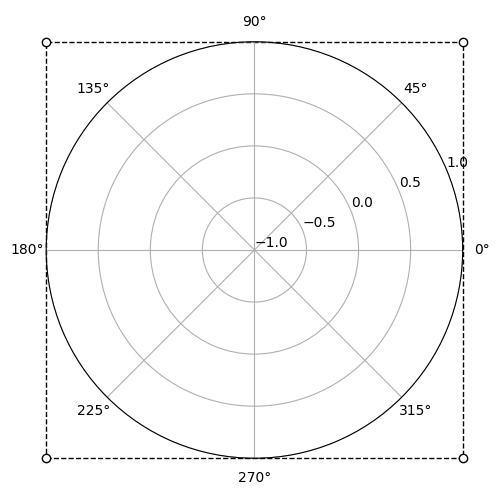

In [19]:
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='polar')

# https://github.com/rougier/scientific-visualization-book/issues/65
ax.set_ylim(-1, 1), ax.set_yticks([-1, -0.5, 0, 0.5, 1])

FC_to_DC = ax.transData.inverted().transform
NDC_to_FC = ax.transAxes.transform
NDC_to_DC = lambda x: FC_to_DC(NDC_to_FC(x))
P = NDC_to_DC([[0,0], [1,0], [1,1], [0,1], [0,0]])

plt.plot(P[:,0], P[:,1], clip_on=False, zorder=-10, color="k", linewidth=1.0, linestyle="--", )
plt.scatter(P[:-1,0], P[:-1,1], clip_on=False, facecolor="w", edgecolor="k")

# https://github.com/rougier/scientific-visualization-book/issues/65
plt.tight_layout()

plt.show()

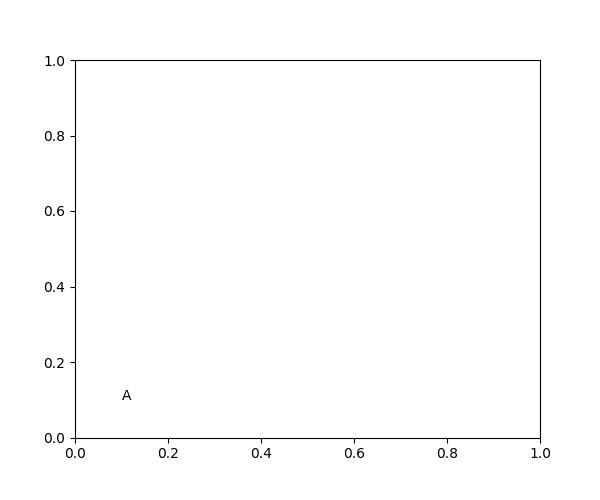

In [28]:
fig = plt.figure(figsize=(6, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.text(0.1, 0.1, "A", transform=ax.transAxes)
plt.show()

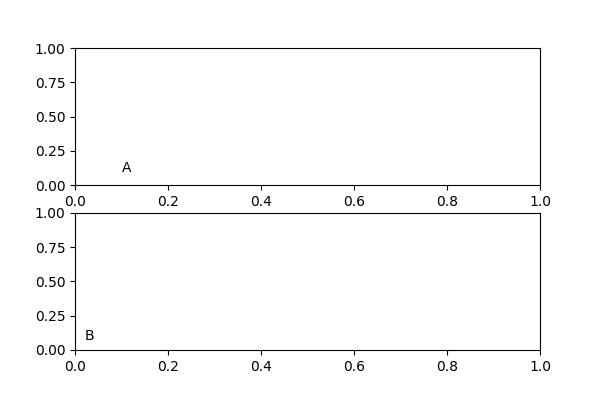

In [34]:
from matplotlib.transforms import ScaledTranslation

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(2, 1, 1)
plt.text(0.1, 0.1, "A", transform=ax.transAxes)

ax = fig.add_subplot(2, 1, 2)
dx, dy = 10/fig.dpi, 10/fig.dpi
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
plt.text(0, 0, "B", transform=ax.transAxes + offset)

plt.show()